## Exploratory Data Analysis (EDA) Task

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/instagram-ads/instagram_posts.json


### Import Libraries

In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from collections import Counter

### Load Dataset

In [3]:

# Load the dataset
with open('/kaggle/input/instagram-ads/instagram_posts.json') as f:
    data = json.load(f)

# Convert to a DataFrame
df = pd.json_normalize(data)

In [4]:
# Basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 43 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   inputUrl                            2800 non-null   object 
 1   id                                  2785 non-null   object 
 2   type                                2785 non-null   object 
 3   shortCode                           2785 non-null   object 
 4   caption                             2785 non-null   object 
 5   hashtags                            2785 non-null   object 
 6   mentions                            2785 non-null   object 
 7   url                                 2785 non-null   object 
 8   commentsCount                       2785 non-null   float64
 9   firstComment                        2785 non-null   object 
 10  latestComments                      2785 non-null   object 
 11  dimensionsHeight                    2785 no

In [5]:
df['type'].value_counts()
# We can see that there are 3 types of posts: image, video, and Sidecar

type
Video      1206
Sidecar     948
Image       631
Name: count, dtype: int64

In [6]:
# Check for missing values in the DataFrame
missing_values = df.isnull().sum()

missing_values

inputUrl                                 0
id                                      15
type                                    15
shortCode                               15
caption                                 15
hashtags                                15
mentions                                15
url                                     15
commentsCount                           15
firstComment                            15
latestComments                          15
dimensionsHeight                        15
dimensionsWidth                         15
displayUrl                              15
images                                  15
videoUrl                              1594
alt                                   1280
likesCount                              15
videoViewCount                        1594
videoPlayCount                        1596
timestamp                               15
childPosts                              15
ownerFullName                           15
ownerUserna

In [7]:
# Let's see what are top 10 hashtags
top_hashtags = df['hashtags'].value_counts().head(10)
print(top_hashtags)

hashtags
[]                                     1557
[OspreyPacks]                           142
[SeeYouOutHere]                          53
[Fjallraven]                             45
[DestoAnthro]                            40
[SpringLightly]                          37
[jointhemvmt, watches, menswatches]      30
[FjallravenPolar2024]                    22
[VSEscapeToSummer]                       18
[jointhemvmt, watches]                   18
Name: count, dtype: int64


We can see that most of the posts have 0 hashtags.

In [8]:
# let's see 5 random captions and watch there are hashtags
import random
for sample in range(5): 
    print(random.choice(df['caption']))
    print("------------------------------------------------------------------")

"@wearpepper was first inspired by my own struggles with body image, coming to terms with being a small-chested woman," says Jaclyn Fu, co-founder (along with Lia Winograd) of the intimates company that specializes in AA, A and B cups. As a teenager, she quickly realized that most bras weren't made for her body type, but it wasn't until starting Pepper in 2017 that she learned just how true that was: Most bra companies design for a 36C, which, she says, is what the US considers the industry average. 

Six years later and Pepper hasn't strayed from its original mission to make bras that *finally* fit small-chested women — and it has the brand loyalty to show for it. "Now that our customers have fallen in love with the fit of our bras, they're asking for everything: 'Can you make swim? Can you make athleisure?' So we have our work cut out for us, product-wise," says Jaclyn 👙💕
------------------------------------------------------------------
The difference between a happy and sad bike ri

What I wanted to see is whether there were hashtags in the captions. The result of the cell above shows that there are hashtags in the captions. 

That means two things:
1. We don't need to clean the captions from the hashtags, as some of them might be contextual.
2. There is no need to keep hashtags column, as it is redundant.

In [9]:
df.head()

,inputUrl,id,type,shortCode,caption,hashtags,mentions,url,commentsCount,firstComment,...,musicInfo.should_mute_audio_reason,musicInfo.audio_id,taggedUsers,coauthorProducers,locationName,locationId,error,description,paidPartnership,sponsors
0,https://www.instagram.com/fjallravenofficial/,3351813129396705531,Video,C6ECEhTLlj7,"In 1960, Fjällräven founder Åke Nordin launche...",[SeeYouOutHere],[],https://www.instagram.com/p/C6ECEhTLlj7/,13.0,Hello! @fjallravenofficial \n\nDid you know th...,...,,1132905601286604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.instagram.com/fjallravenofficial/,3335943316421297980,Video,C5LpsWOIUc8,"If there’s one question Fjällräven friend, Sof...",[SeeYouOutHere],[fjalldrottningen],https://www.instagram.com/p/C5LpsWOIUc8/,24.0,These are great tips 👏,...,,442696801662083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.instagram.com/fjallravenofficial/,3319217982042076436,Sidecar,C4QOysvtPUU,Who inspires you to spend time in nature? We w...,[SeeYouOutHere],[],https://www.instagram.com/p/C4QOysvtPUU/,7.0,Wow this is awesome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.instagram.com/fjallravenofficial/,3372181927023212519,Sidecar,C7MZZiWNffn,Looking to get new shorts and tops for the sun...,[Fjallraven],[],https://www.instagram.com/p/C7MZZiWNffn/,0.0,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://www.instagram.com/fjallravenofficial/,3369947094264728619,Video,C7EdQcJgkwr,How to handle wet days on the trail? We asked ...,[SeeYouOutHere],[],https://www.instagram.com/p/C7EdQcJgkwr/,6.0,What wax would be good?,...,,1494600218136074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Distribution

In [10]:
print("Total number of posts:", df.shape[0])
print("Average number of likes:", df['commentsCount'].mean())
print("Average number of comments:", df['likesCount'].mean())

Total number of posts: 2800
Average number of likes: 113.33177737881508
Average number of comments: 4256.274326750448


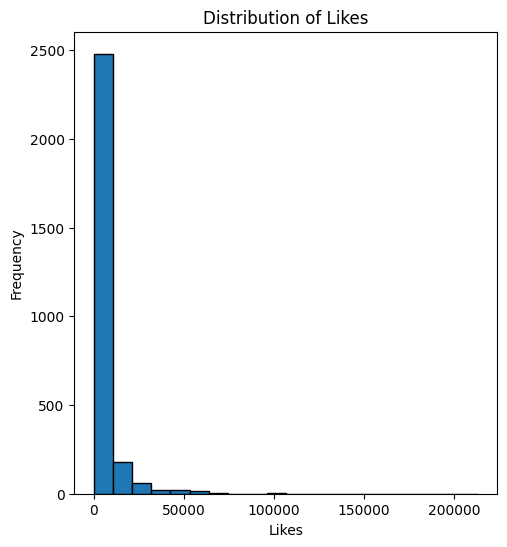

In [11]:
# Histogram of likes and comments
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(df['likesCount'].dropna(), bins=20, edgecolor='k')
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.ylabel('Frequency')

plt.show()

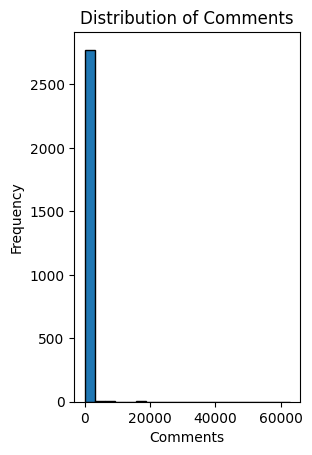

In [12]:
plt.subplot(1, 2, 2)
plt.hist(df['commentsCount'].dropna(), bins=20, edgecolor='k')
plt.title('Distribution of Comments')
plt.xlabel('Comments')
plt.ylabel('Frequency')

plt.show()

Now let's see the relationship between likes and comments.

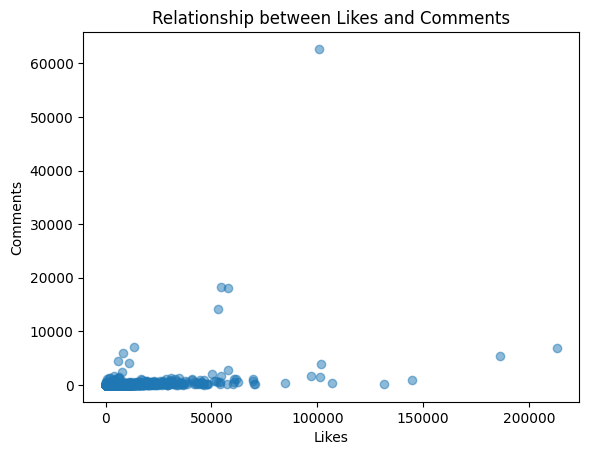

In [13]:
plt.scatter(df['likesCount'], df['commentsCount'], alpha=0.5)
plt.title('Relationship between Likes and Comments')
plt.xlabel('Likes')
plt.ylabel('Comments')
plt.show()

There is some outlier in the dataset, at least in the comments.

In [14]:
# That is strange. What is the maximum of comments
df['commentsCount'].max()

62706.0

Wow. Don't know can cause such number of comments. It maybe bots or something else. 

Anyway show the previous plot without that outlier, hope it will be better.

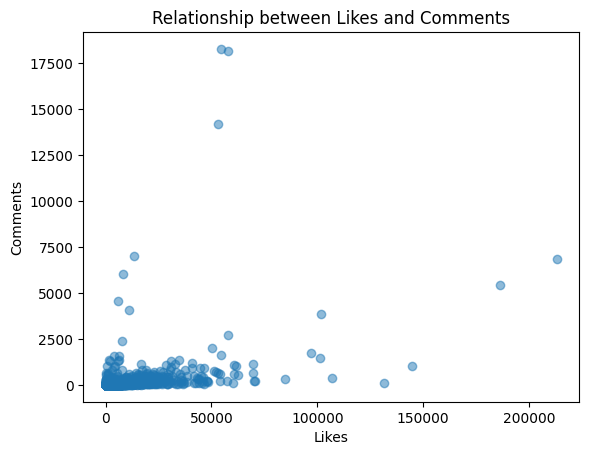

In [15]:
# show the previous plot without that outlier
comments_without_outlier = df[df['commentsCount'] < 20000]

plt.scatter(comments_without_outlier['likesCount'].dropna(), comments_without_outlier['commentsCount'].dropna(), alpha=0.5)
plt.title('Relationship between Likes and Comments')
plt.xlabel('Likes')
plt.ylabel('Comments')
plt.show()

Much better :)

Now, let's find out whether the number of likes and comments is related to the number of hashtags.

Firstly, we have to do some feature engineering and create a new column with the number of hashtags in each post.

In [16]:
# create a new column with the number of hashtags in each post
df['hashtags_count'] = df['hashtags'].apply(lambda x: len(x) if isinstance(x, list) else 0)

df['hashtags_count'].value_counts()

hashtags_count
0     1572
1      552
3      187
2      179
4      106
5      101
6       51
7       19
30      10
8        8
9        4
14       3
23       2
17       2
12       1
15       1
13       1
16       1
Name: count, dtype: int64

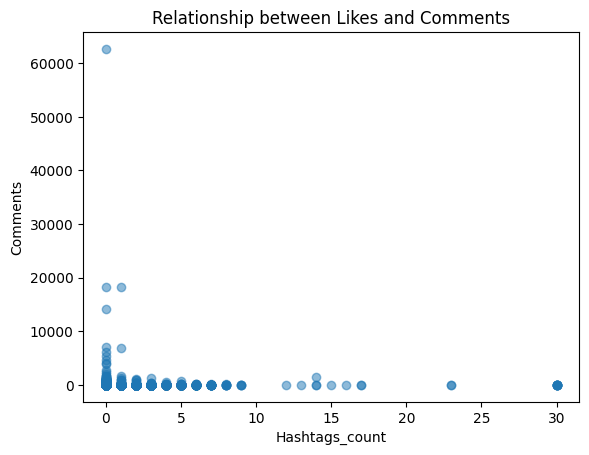

In [17]:
# Let's see is whether the number of likes and comments is related to the number of hashtags.
plt.scatter(df['hashtags_count'], df['commentsCount'], alpha=0.5)
plt.title('Relationship between Likes and Comments')
plt.xlabel('Hashtags_count')
plt.ylabel('Comments')
plt.show()

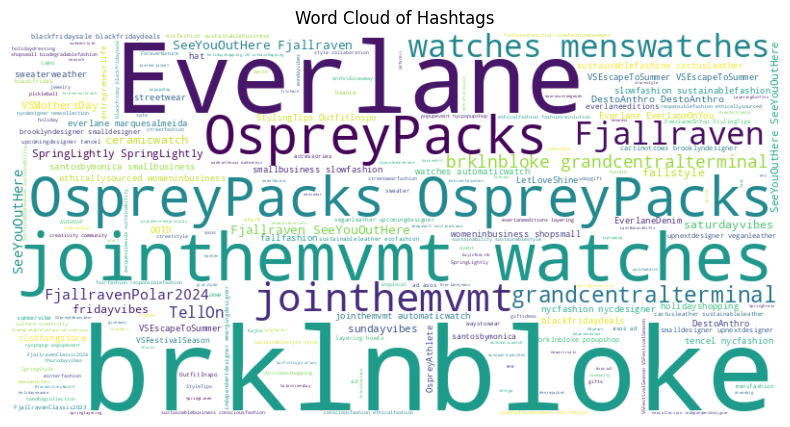

In [18]:
# Let's create a word cloud for hashtags
all_hashtags = ' '.join([ht for sublist in df['hashtags'].dropna() for ht in sublist])
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_hashtags)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Hashtags')
plt.show()

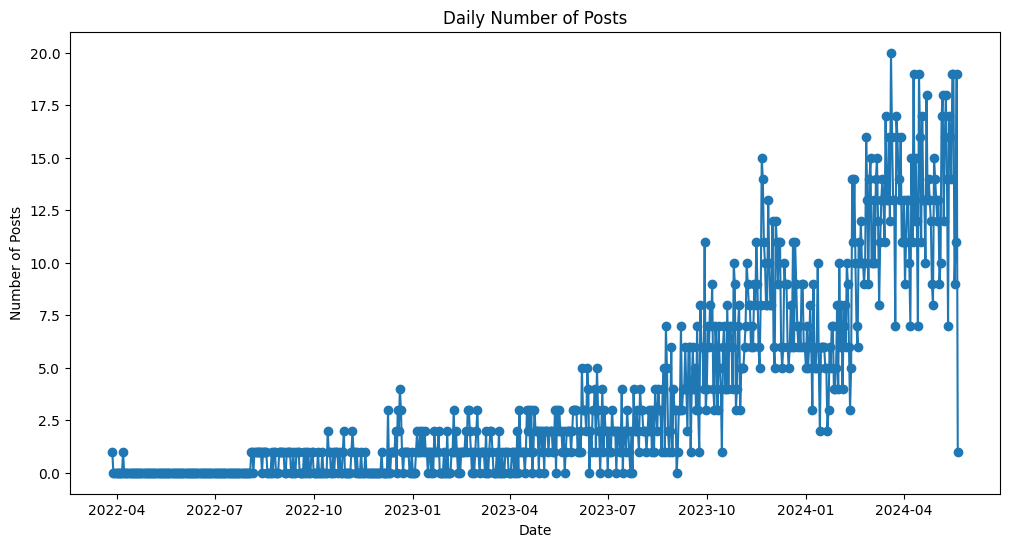

In [19]:
# Time series analysis of posts
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df['post_count'] = 1

daily_posts = df.resample('D').sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_posts.index, daily_posts['post_count'], marker='o')
plt.title('Daily Number of Posts')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.show()


In [20]:
# Function to extract special characters from text
def extract_special_characters(text):
    # Regex to find all non-alphanumeric characters
    special_chars = re.findall(r'[^a-zA-Z0-9\s]', text)
    return special_chars

# Collect all text data from captions and comments
all_text = []

# Extracting from captions
if 'caption' in df.columns:
    captions = df['caption'].dropna().tolist()
    all_text.extend(captions)


# Extract all special characters from the collected text
special_characters = []
for text in all_text:
    special_characters.extend(extract_special_characters(text))

# Count the frequency of each special character
special_char_count = Counter(special_characters)

# List unique special characters
unique_special_characters = list(special_char_count.keys())

# Display results
print("List of unique special characters used in posts:")
print(unique_special_characters)
print("\nFrequency of each special character:")
print(special_char_count)

List of unique special characters used in posts:
[',', 'ä', 'Å', '.', '(', ')', '’', '&', '-', 'ö', '#', '@', '?', '!', '–', "'", '“', '”', '👀', '|', '📷', '_', '+', '😎', '🍃', '™', '—', '👋', '🌴', '/', '☁', '️', '🌲', '⛰', '🌎', '🌷', '✨', ':', '🤍', '☀', '…', '\U0001fabd', '❣', '🪡', '🧵', '💛', '💙', '⛅', '🪞', '💖', '⭐', '😉', '🧑', '\u200d', '🍳', '🇯', '🇵', 'é', '💎', '👇', '💫', '💄', 'ë', '‘', '☝', '😱', '💐', '📸', '🥇', '⛳', '®', '\u2060', '%', '"', '💗', '🔗', '📣', '📍', '[', ']', '🧈', '😌', '<', '\xad', 'á', '🎥', '🛻', '🗣', '*', '🇬', '🇧', 'å', '\U0001f979', '$', '🤲', '🏽', '♥', '🍾', '🎊', '🙌', '>', '🌮', '🌟', '💥', '🌽', '🇲', '🇽', '🔥', '\U0001faae', ';', '🌀', '\U0001faf6', '⚡', '🫖', '🥂', '❤', '⌚', '💭', '🧡', '\U0001fa77', '🕶', '🏁', '🐾', '😊', '\u2063', '🤙', 'è', '🛫', '🍀', '🌙', '✈', '♻', '🌿', '🤭', '🇹', '🇼', '✂', '👖', '😏', '🖤', '🛒', '🍫', '🌐', '💧', '🔊', '🍬', '🏊', '🏾', '📡', '🦠', '🍊', '⋆', '｡', '°', '✩', '⛱', '🍓', '🍋', '🌞', '🙏', '🏿', '💯', '🤩', '👕', '🐆', '=', '\U0001faa9', '🍸', '💌', '🤎', '🌈', '🌼', '🍹', '🥕', '🗯', '🍒'

Now, let's break down how these characters might be categorized and understood in the context of your dataset.

### Categorization of Special Characters

1. **Punctuation Marks:**
   - Common: `,`, `.`, `!`, `?`, `:`, `;`, `-`, `_`, `...`
   - Brackets: `(`, `)`, `[`, `]`, `{`, `}`
   - Quotes: `"`, `'`, `’`, `“`, `”`
   - Special punctuation: `—`, `–`, `|`, `…`, `*`, `•`

2. **Symbols:**
   - Mathematical: `+`, `=`, `%`, `$`, `£`
   - Miscellaneous: `@`, `#`, `&`, `™`, `®`, `©`

3. **Emojis:**
   - Faces: `😊`, `😉`, `😃`, `😂`, `😘`, `😇`, `😱`, `🤯`, `🥰`, `😜`, `🤩`, `🥺`
   - Gestures: `🙏`, `👏`, `👌`, `👊`, `👋`, `🤙`, `🤛`, `🤜`, `✌️`, `👂`, `👃`, `👁`, `👀`, `🧑‍🎤`
   - Objects: `📷`, `📸`, `📺`, `📚`, `📖`, `📅`, `📆`, `📈`, `📉`, `📊`, `📍`, `📞`, `📡`, `📢`, `📣`, `📦`, `📝`, `💼`, `💻`, `📱`, `📲`, `🖥️`, `🖨️`, `🖱️`
   - Nature: `🌲`, `🌳`, `🌴`, `🌵`, `🌻`, `🌼`, `🌸`, `🌺`, `🍁`, `🍂`, `🍃`, `🍀`, `🍎`, `🍏`, `🍐`, `🍑`, `🍒`, `🍓`, `🍅`, `🍇`, `🍈`, `🍉`, `🍊`, `🍋`, `🍌`, `🍍`, `🥥`, `🥑`, `🍅`, `🌾`, `🌿`, `🍂`, `🍄`
   - Food & Drink: `🍴`, `🍻`, `🍺`, `🍷`, `🥂`, `🍹`, `🍸`, `🍾`, `🍿`, `🍩`, `🍪`, `🍫`, `🍬`, `🍭`, `🍰`, `🍯`, `🍳`, `🥚`, `🍞`, `🥐`, `🥯`, `🥖`, `🥨`, `🥞`, `🧇`, `🧈`, `🍖`, `🍗`, `🥩`, `🥓`, `🍔`, `🍟`, `🍕`, `🌭`, `🥪`, `🌮`, `🌯`, `🥙`, `🧆`, `🍚`, `🍘`, `🍙`, `🍜`, `🍝`, `🍲`, `🍛`, `🍣`, `🍤`, `🍥`, `🥟`, `🥠`, `🥡`, `🦀`, `🦞`, `🦐`, `🦑`, `🥘`, `🍚`, `🍘`, `🍙`, `🍤`, `🍥`, `🍲`
   - Activities: `⚽️`, `🏀`, `🏈`, `⚾️`, `🎾`, `🎱`, `🏓`, `🏸`, `🥅`, `🏒`, `🏑`, `🏏`, `⛳️`, `🏹`, `🎣`, `🎽`, `🥋`, `⛸️`, `🛷`, `🥌`, `🛹`, `🛼`, `🛴`, `⛷️`, `🏂`, `🏋️`, `🤼`, `🤸`, `⛹️`, `🤺`, `🤾`, `🏇`, `🧗`, `🏄`, `🏊`, `🤽`, `🚣`, `🧘`, `🏋️`, `⛷️`, `🏂`, `🏌️`, `🎿`, `🏇`, `🚵`, `🚴`, `🏋️`, `🧗`, `🤺`, `🤼`, `🧘`, `⛹️`, `🏌️`, `🚴`, `🏋️`, `🧗`, `⛷️`, `🏂`, `🏇`, `🏌️`, `⛸️`, `🛷`, `⛷️`, `🏂`, `🏋️`, `🧗`, `🤺`, `🧘`, `⛷️`, `🏂`, `🏇`, `🏋️`, `🧗`, `🤺`, `🧘`, `⛸️`, `🛷`, `⛷️`, `🏂`, `🏋️`, `🧗`, `🤺`, `🧘`, `⛹️`, `🏌️`, `🚴`, `🏋️`, `🧗`

**I wouldn't recommend deleting all the special characters (at least emojis can be left) as they can help create a captivating caption to the post. **

In [21]:
# Function to remove emojis
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F700-\U0001F77F"  # alchemical symbols
        u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
        u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
        u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
        u"\U0001FA00-\U0001FA6F"  # Chess Symbols
        u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
        u"\U00002702-\U000027B0"  # Dingbats
        u"\U000024C2-\U0001F251" 
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

# Select an example post
example_post = data[567]  # Let's take the first post for example
caption_with_emojis = example_post.get('caption', '')
caption_without_emojis = remove_emojis(caption_with_emojis)

# Display the example post with and without emojis
print("Caption with emojis:")
print("\n-------------------------------------------------\n")
print(caption_with_emojis)
print("\n=========================================================================")
print("\nCaption without emojis:")
print("\n-------------------------------------------------\n")
print(caption_without_emojis)


Caption with emojis:

-------------------------------------------------

SPRING COLORS🌱RESTOCK THIS FRIDAY 3/8 NOON ET 

🍃DOUBLE MINT
💜LAVENDER
🌽🥩CORNED BEEF
💡GLUE
🌌CERULEAN 

🛒TELFAR.NET

🖤 @sariya_pumpkin @ritadashash @lauraleebenjamin @trapselyna @imreallyhellapretty @bethany.saunders @hausoftelfar @arieeanggara


Caption without emojis:

-------------------------------------------------

SPRING COLORSRESTOCK THIS FRIDAY 3/8 NOON ET 

DOUBLE MINT
LAVENDER
CORNED BEEF
GLUE
CERULEAN 

TELFAR.NET

 @sariya_pumpkin @ritadashash @lauraleebenjamin @trapselyna @imreallyhellapretty @bethany.saunders @hausoftelfar @arieeanggara


**Anyway let's try and preprocess the text.**

In [22]:
import spacy
# Handling Special Characters
nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_punct and not token.is_space]
    return ' '.join(tokens)

text = preprocess_text(text)


In [23]:
text

'this weekend keep thing neutral speak of our new and improve body by Victoria collection be now in an expand range of tonal shade'

In [24]:
# Extract the captions and compute their lengths
caption_lengths = [len(post.get('caption', '')) for post in data]

# Filter out posts with empty captions
non_empty_captions = [post for post in data if len(post.get('caption', '')) > 0]
non_empty_caption_lengths = [len(post['caption']) for post in non_empty_captions]

# Calculate average, min, and max caption lengths
average_length = np.mean(caption_lengths)
min_length = np.min(caption_lengths)
max_length = np.max(caption_lengths)

# Display the results
print("Caption Length Analysis:")

print(f"Average caption length: {average_length:.2f} characters")
print(f"Minimum caption length: {min_length} characters")
print(f"Maximum caption length: {max_length} characters")

# print('Filtered list of lengths:')
# print(sorted(non_empty_caption_lengths))


Caption Length Analysis:
Average caption length: 234.24 characters
Minimum caption length: 0 characters
Maximum caption length: 2078 characters


In [25]:
# We need to take a second minimum post as the mininmum caption length is 0
second_min_length = sorted(non_empty_caption_lengths)[0]


# Find the post with the second minimum caption length
second_min_post = None
if second_min_length:
    for post in non_empty_captions:
        if len(post['caption']) == second_min_length:
            second_min_post = post
            break

min_post = np.argmin(second_min_post)
max_post = np.argmax(caption_lengths)

second_min_caption = data[min_post].get('caption', '')
max_caption = data[max_post].get('caption', '')

print(f'Second minimum length caption:\n {second_min_caption}')
print("\n-----------------------------------------------------------------\n")
print(f"Caption with maximum length:\n {max_caption}")

Second minimum length caption:
 In 1960, Fjällräven founder Åke Nordin launched the aluminium backpack frame. In 2013, we (re)introduced wood frames, because they have a considerably lower carbon footprint and are just as durable. Find out how they’re made from Sustainable Material & Chemical Specialist, Felix Aejmelaeus-Lindström. It’s the fourth episode of our Ladan Labs video series, where we get into the science of durability, materials and sustainability. 
 
#SeeYouOutHere

-----------------------------------------------------------------

Caption with maximum length:
 I am so happy to share that the new Kånken Art collection has officially launched across the globe with @fjallravenofficial @kankenofficial with my artwork featured. This is the 6th Kånken Art collection and I am the first artist outside of Sweden to be featured. 
✨
I started studying Coast Salish art in 2012. The design I choose to feature is based off a sketch I drew in 2013 of a Spindle whorl carved by my ancesto

### Conclusion

What we've done so far is:
* Made some basic analysis of a dataset
* Checked for missing values
* Analyzed data distribution
* Examined correlations between numerical features
* Investigated categorical feature distributions
* Explored relationships between numerical features
* Preprocessed text